In [7]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV,LassoCV

In [8]:
df=pd.read_csv("Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [9]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League",
                      "Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [11]:
df.shape

(263, 20)

In [13]:
lasso_model=Lasso().fit(x_train,y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [14]:
lasso_model

Lasso()

In [15]:
lasso_model.intercept_

-5.587450677336506

In [16]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [17]:
# farklı lambda değerleri

In [18]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,1000,10)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.988e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.762e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

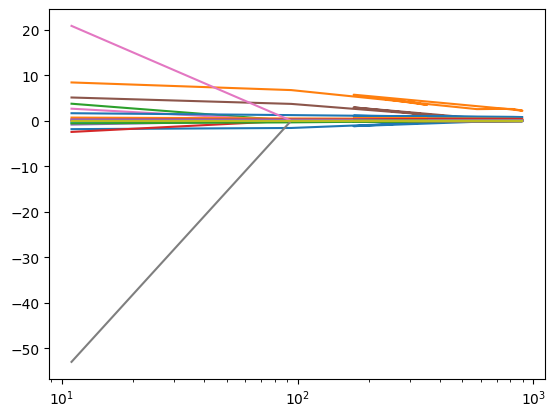

In [19]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [20]:
lasso_model

Lasso()

In [21]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [22]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [23]:
y_pred=lasso_model.predict(x_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [25]:
r2_score(y_test,y_pred)

0.41422798132366156

In [26]:
#model turnig

In [34]:
alphas=10**np.linspace(10,-2,100)*0.5

In [37]:
lasso_cv_model=LassoCV(cv=10,max_iter=100000).fit(x_train,y_train)

In [38]:
lasso_cv_model.alpha_

563.4670501833853

In [39]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)

In [40]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)

In [41]:
y_pred=lasso_tuned.predict(x_test)

In [42]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.59572250697937

In [44]:
pd.Series(lasso_tuned.coef_,index=x_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64